In [1]:
!nvidia-smi

Sat Jul 24 12:01:19 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   74C    P0    33W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from google.colab import drive
drive.mount('/content/drive')
GPU = 'Tesla T4'
import pandas as pd

epochs = 50

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
 import matplotlib.pyplot as plt 

In [4]:
import pickle
# load files
with open('/content/drive/MyDrive/deeplearning_file/sg/imageswithoutcut.pickle', 'rb') as f:
    images = pickle.load(f)

with open('/content/drive/MyDrive/deeplearning_file/sg/labelswithoutcut.pickle', 'rb') as f:
    labels = pickle.load(f)

In [5]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(labels)
labels_encoded = encoder.transform(labels)
labels_encoded[:3], encoder.classes_

(array([0, 0, 0]), array(['can', 'glass', 'paper', 'plastic'], dtype='<U7'))

In [6]:
import numpy as np
s0 = len(np.where(labels_encoded==0)[0])
s1 = len(np.where(labels_encoded==1)[0])
s2 = len(np.where(labels_encoded==2)[0])
s3 = len(np.where(labels_encoded==3)[0])

In [7]:
len(images), len(labels), len(labels_encoded)

(3770, 3770, 3770)

In [8]:
X_train = np.concatenate((images[:int(s0*0.8)], images[s0:s0+int(s1*0.8)], images[s0+s1:s0+s1+int(s2*0.8)], images[s0+s1+s2:s0+s1+s2+int(s3 *0.8)], images[s0+s1+s2+s3:] ), axis=0)
X_test = np.concatenate((images[int(s0*0.8):s0], images[s0+int(s1*0.8):s0+s1], images[s0+s1+int(s2*0.8):s0+s1+s2], images[s0+s1+s2+int(s3*0.8):s0+s1+s2+s3]), axis=0)
y_train = np.concatenate((labels_encoded[:int(s0*0.8)], labels_encoded[s0:s0+int(s1*0.8)], labels_encoded[s0+s1:s0+s1+int(s2*0.8)], labels_encoded[s0+s1+s2:s0+s1+s2+int(s3 *0.8)], labels_encoded[s0+s1+s2+s3:]), axis=0)
y_test = np.concatenate((labels_encoded[int(s0*0.8):s0], labels_encoded[s0+int(s1*0.8):s0+s1], labels_encoded[s0+s1+int(s2*0.8):s0+s1+s2], labels_encoded[s0+s1+s2+int(s3*0.8):s0+s1+s2+s3]), axis=0)

X_train.shape, X_test.shape

((3015, 128, 128, 3), (755, 128, 128, 3))

In [9]:
!pip install tensorflow-gpu==2.0.0-rc1
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential

In [10]:
cnn_model = Sequential()
cnn_model.add(layers.Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',
                 input_shape=(128,128,3)))
cnn_model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
cnn_model.add(layers.Conv2D(64, (5, 5), activation='relu'))
cnn_model.add(layers.MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(1000, activation='relu'))
cnn_model.add(layers.Dense(4, activation='softmax'))

In [11]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 124, 124, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 58, 58, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 29, 29, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 53824)             0         
_________________________________________________________________
dense (Dense)                (None, 1000)              53825000  
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 4

In [12]:
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [13]:
import time

start_time = time.time()
hist = cnn_model.fit(X_train.reshape(len(X_train), 128, 128, 3), y_train, epochs=epochs, verbose=1, validation_data=(X_test.reshape(len(X_test), 128, 128, 3), y_test))
fit_time = time.time() - start_time
print('fit : time : ', fit_time)

Train on 3015 samples, validate on 755 samples
Epoch 1/50
3015/3015 [==============================] - 11s 4ms/sample - loss: 1.4928 - accuracy: 0.5861 - val_loss: 0.8199 - val_accuracy: 0.6437
Epoch 2/50
3015/3015 [==============================] - 4s 1ms/sample - loss: 0.5485 - accuracy: 0.7973 - val_loss: 0.9223 - val_accuracy: 0.6199
Epoch 3/50
3015/3015 [==============================] - 4s 1ms/sample - loss: 0.4158 - accuracy: 0.8474 - val_loss: 0.9229 - val_accuracy: 0.6278
Epoch 4/50
3015/3015 [==============================] - 4s 1ms/sample - loss: 0.2720 - accuracy: 0.9081 - val_loss: 1.1589 - val_accuracy: 0.6291
Epoch 5/50
3015/3015 [==============================] - 4s 1ms/sample - loss: 0.1855 - accuracy: 0.9330 - val_loss: 1.1694 - val_accuracy: 0.6464
Epoch 6/50
3015/3015 [==============================] - 4s 1ms/sample - loss: 0.1290 - accuracy: 0.9592 - val_loss: 1.4001 - val_accuracy: 0.6490
Epoch 7/50
3015/3015 [==============================] - 4s 1ms/sample - loss

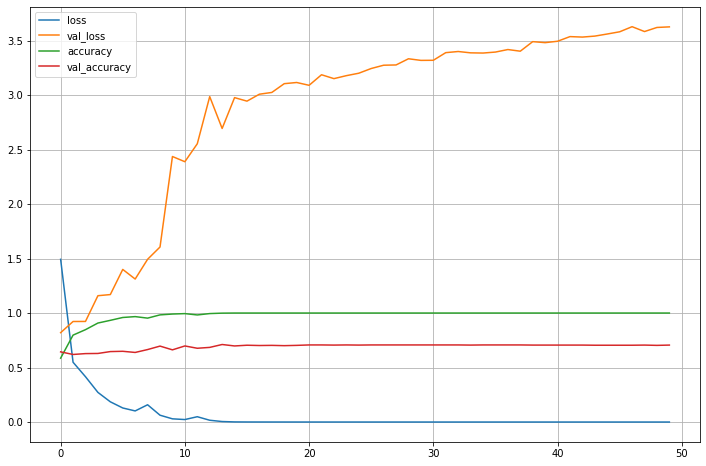

In [14]:
plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']
plt.figure(figsize=(12,8))

for each in plot_target:
    plt.plot(hist.history[each], label=each)

plt.legend()
plt.grid()
plt.show()

In [15]:
history = pd.DataFrame([range(1, epochs+1), hist.history['val_loss'], hist.history['val_accuracy'],['CNN Conv2D:2' for _ in range(epochs) ], [(epoch+1)*fit_time/50 for epoch in range(epochs)], [cnn_model.count_params() for epoch in range(epochs)]   ]).T

In [16]:
history.columns = ['epochs', 'loss', 'accuracy', 'model', 'fit_time', 'total_params']

In [17]:
history.sort_values('accuracy') 

,epochs,loss,accuracy,model,fit_time,total_params
1,2,0.922279,0.619868,CNN Conv2D:2,7.73231,53882700
2,3,0.922912,0.627815,CNN Conv2D:2,11.5985,53882700
3,4,1.15895,0.629139,CNN Conv2D:2,15.4646,53882700
6,7,1.3119,0.638411,CNN Conv2D:2,27.0631,53882700
0,1,0.819872,0.643709,CNN Conv2D:2,3.86615,53882700
4,5,1.16941,0.646358,CNN Conv2D:2,19.3308,53882700
5,6,1.40008,0.649007,CNN Conv2D:2,23.1969,53882700
9,10,2.43595,0.662252,CNN Conv2D:2,38.6615,53882700
7,8,1.49307,0.664901,CNN Conv2D:2,30.9292,53882700
11,12,2.55293,0.676821,CNN Conv2D:2,46.3939,53882700


In [18]:
cnn2_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2)),
    layers.Dropout(0.25),
    
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPool2D(pool_size=(2, 2)),
    layers.Dropout(0.25),
    
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPool2D(pool_size=(2, 2)),
    layers.Dropout(0.25),
    
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(4, activation='softmax')
])

cnn2_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 63, 63, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 31, 31, 64)       

In [19]:
cnn2_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [20]:
import time

start_time = time.time()
hist = cnn2_model.fit(X_train.reshape(len(X_train), 128, 128, 3), y_train, epochs=epochs, verbose=1, validation_data=(X_test.reshape(len(X_test), 128, 128, 3), y_test))
fit_time = time.time() - start_time
print('fit : time : ', fit_time)

Train on 3015 samples, validate on 755 samples
Epoch 1/50
3015/3015 [==============================] - 4s 1ms/sample - loss: 1.1712 - accuracy: 0.5280 - val_loss: 1.2194 - val_accuracy: 0.4914
Epoch 2/50
3015/3015 [==============================] - 3s 853us/sample - loss: 0.7627 - accuracy: 0.6935 - val_loss: 0.8960 - val_accuracy: 0.6225
Epoch 3/50
3015/3015 [==============================] - 3s 854us/sample - loss: 0.5705 - accuracy: 0.7847 - val_loss: 0.8912 - val_accuracy: 0.6106
Epoch 4/50
3015/3015 [==============================] - 3s 857us/sample - loss: 0.4163 - accuracy: 0.8478 - val_loss: 0.8723 - val_accuracy: 0.6278
Epoch 5/50
3015/3015 [==============================] - 3s 848us/sample - loss: 0.3002 - accuracy: 0.8935 - val_loss: 0.7365 - val_accuracy: 0.6954
Epoch 6/50
3015/3015 [==============================] - 3s 854us/sample - loss: 0.2425 - accuracy: 0.9128 - val_loss: 0.6904 - val_accuracy: 0.7245
Epoch 7/50
3015/3015 [==============================] - 3s 845us/sa

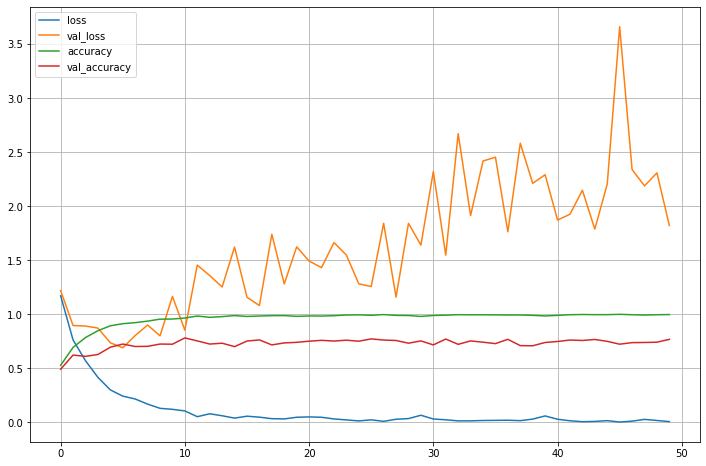

In [21]:
plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']
plt.figure(figsize=(12,8))

for each in plot_target:
    plt.plot(hist.history[each], label=each)

plt.legend()
plt.grid()
plt.show()

In [22]:
history2 = pd.DataFrame([range(1, epochs+1), hist.history['val_loss'], hist.history['val_accuracy'],['CNN Conv2D:3 with_dropout' for _ in range(epochs) ], [(epoch+1)*fit_time/50 for epoch in range(epochs)], [cnn2_model.count_params() for epoch in range(epochs)]   ]).T

In [23]:
history2.columns = ['epochs', 'loss', 'accuracy', 'model', 'fit_time', 'total_params']

In [24]:
history = pd.concat([history, history2])

In [25]:
cnn3_model = models.Sequential([
    layers.Conv2D(32, (5, 5), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2)),
    
    layers.Conv2D(64, (5, 5), activation='relu', padding='same'),
    layers.MaxPool2D(pool_size=(2, 2)),
    
    layers.Conv2D(64, (5, 5), activation='relu', padding='same'),
    layers.MaxPool2D(pool_size=(2, 2)),
    
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(4, activation='softmax')
])

cnn3_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 124, 124, 32)      2432      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 62, 62, 64)        51264     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 31, 31, 64)        102464    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 14400)            

In [26]:
cnn3_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [27]:
import time

start_time = time.time()
hist = cnn3_model.fit(X_train.reshape(len(X_train), 128, 128, 3), y_train, epochs=epochs, verbose=1, validation_data=(X_test.reshape(len(X_test), 128, 128, 3), y_test))
fit_time = time.time() - start_time
print('fit : time : ', fit_time)

Train on 3015 samples, validate on 755 samples
Epoch 1/50
3015/3015 [==============================] - 4s 1ms/sample - loss: 1.0041 - accuracy: 0.5841 - val_loss: 1.0276 - val_accuracy: 0.5987
Epoch 2/50
3015/3015 [==============================] - 3s 988us/sample - loss: 0.6074 - accuracy: 0.7738 - val_loss: 0.8785 - val_accuracy: 0.6278
Epoch 3/50
3015/3015 [==============================] - 3s 986us/sample - loss: 0.5098 - accuracy: 0.8139 - val_loss: 0.8514 - val_accuracy: 0.6570
Epoch 4/50
3015/3015 [==============================] - 3s 981us/sample - loss: 0.3829 - accuracy: 0.8600 - val_loss: 0.8808 - val_accuracy: 0.6583
Epoch 5/50
3015/3015 [==============================] - 3s 981us/sample - loss: 0.2799 - accuracy: 0.9012 - val_loss: 0.9129 - val_accuracy: 0.6821
Epoch 6/50
3015/3015 [==============================] - 3s 987us/sample - loss: 0.2466 - accuracy: 0.9121 - val_loss: 0.7848 - val_accuracy: 0.7020
Epoch 7/50
3015/3015 [==============================] - 3s 985us/sa

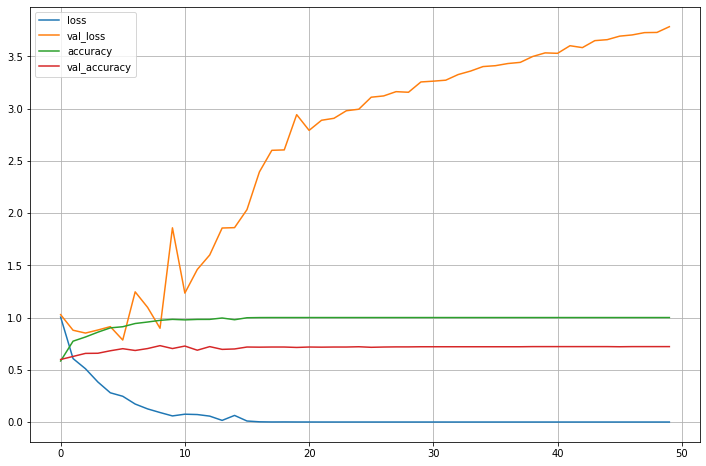

In [28]:
plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']
plt.figure(figsize=(12,8))

for each in plot_target:
    plt.plot(hist.history[each], label=each)

plt.legend()
plt.grid()
plt.show()

In [29]:
history2 = pd.DataFrame([range(1, epochs+1), hist.history['val_loss'], hist.history['val_accuracy'],['CNN Conv2D:3' for _ in range(epochs) ], [(epoch+1)*fit_time/50 for epoch in range(epochs)], [cnn3_model.count_params() for epoch in range(epochs)]   ]).T

In [30]:
history2.columns = ['epochs', 'loss', 'accuracy', 'model', 'fit_time', 'total_params']

In [31]:
history = pd.concat([history, history2])

In [32]:
deeplearning_model = models.Sequential([
    layers.Flatten(input_shape = (128, 128, 3)),
    layers.Dense(1000, activation='relu'),
    layers.Dense(4, activation='softmax')
])

deeplearning_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 49152)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 1000)              49153000  
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 4004      
Total params: 49,157,004
Trainable params: 49,157,004
Non-trainable params: 0
_________________________________________________________________


In [33]:
deeplearning_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [34]:
import time

start_time = time.time()
hist = deeplearning_model.fit(X_train.reshape(len(X_train), 128, 128, 3), y_train, epochs=epochs, verbose=1, validation_data=(X_test.reshape(len(X_test), 128, 128, 3), y_test))
fit_time = time.time() - start_time
print('fit : time : ', fit_time)

Train on 3015 samples, validate on 755 samples
Epoch 1/50
3015/3015 [==============================] - 2s 818us/sample - loss: 17.6942 - accuracy: 0.5542 - val_loss: 6.0978 - val_accuracy: 0.4040
Epoch 2/50
3015/3015 [==============================] - 2s 671us/sample - loss: 5.0383 - accuracy: 0.6073 - val_loss: 9.4205 - val_accuracy: 0.3020
Epoch 3/50
3015/3015 [==============================] - 2s 662us/sample - loss: 4.0770 - accuracy: 0.6444 - val_loss: 2.6976 - val_accuracy: 0.5815
Epoch 4/50
3015/3015 [==============================] - 2s 675us/sample - loss: 2.0414 - accuracy: 0.6879 - val_loss: 3.8018 - val_accuracy: 0.3576
Epoch 5/50
3015/3015 [==============================] - 2s 675us/sample - loss: 1.8115 - accuracy: 0.6925 - val_loss: 2.9287 - val_accuracy: 0.5417
Epoch 6/50
3015/3015 [==============================] - 2s 691us/sample - loss: 2.1756 - accuracy: 0.6587 - val_loss: 1.2925 - val_accuracy: 0.5616
Epoch 7/50
3015/3015 [==============================] - 2s 687us

In [35]:
history2 = pd.DataFrame([range(1, epochs+1), hist.history['val_loss'], hist.history['val_accuracy'],['Deep learning' for _ in range(epochs) ], [(epoch+1)*fit_time/50 for epoch in range(epochs)], [deeplearning_model.count_params() for epoch in range(epochs)]   ]).T

In [36]:
history2.columns = ['epochs', 'loss', 'accuracy', 'model', 'fit_time', 'total_params']

In [37]:
history = pd.concat([history, history2])

In [38]:
history.sort_values("loss")

,epochs,loss,accuracy,model,fit_time,total_params
5,6,0.690391,0.724503,CNN Conv2D:3 with_dropout,15.6727,7431684
4,5,0.736472,0.695364,CNN Conv2D:3 with_dropout,13.0606,7431684
5,6,0.784752,0.701987,CNN Conv2D:3,18.0834,7531524
49,50,0.784756,0.696689,Deep learning,102.804,49157004
8,9,0.800701,0.724503,CNN Conv2D:3 with_dropout,23.5091,7431684
...,...,...,...,...,...,...
48,49,3.72874,0.721854,CNN Conv2D:3,147.681,7531524
49,50,3.78375,0.721854,CNN Conv2D:3,150.695,7531524
3,4,3.80179,0.357616,Deep learning,8.22436,49157004
0,1,6.09778,0.403974,Deep learning,2.05609,49157004


In [39]:
#### 

In [40]:
#vgg16
import tensorflow as tf
from tensorflow import keras
tf.keras.backend.clear_session()
tf.random.set_seed(42)

keras_vgg16_model = keras.applications.vgg16.VGG16(include_top=False, input_shape = (128,128,3))
avg = keras.layers.GlobalAveragePooling2D()(keras_vgg16_model.output)
output = keras.layers.Dense(4, activation="softmax")(avg)
keras_vgg16_model = keras.models.Model(inputs=keras_vgg16_model.input, outputs=output)

optimizer = keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)


58892288/58889256 [==============================] - 1s 0us/step


In [41]:
keras_vgg16_model.compile(optimizer =optimizer ,loss = 'sparse_categorical_crossentropy',metrics =['accuracy'])

In [42]:
import time

start_time = time.time()
hist = keras_vgg16_model.fit(X_train.reshape(len(X_train), 128, 128, 3), y_train, epochs=epochs, verbose=1, validation_data=(X_test.reshape(len(X_test), 128, 128, 3), y_test))
fit_time = time.time() - start_time
print('fit : time : ', fit_time)

Train on 3015 samples, validate on 755 samples
Epoch 1/50
3015/3015 [==============================] - 25s 8ms/sample - loss: 1.6448 - accuracy: 0.3380 - val_loss: 1.3294 - val_accuracy: 0.3603
Epoch 2/50
3015/3015 [==============================] - 16s 5ms/sample - loss: 1.6583 - accuracy: 0.4123 - val_loss: 1.3908 - val_accuracy: 0.4119
Epoch 3/50
3015/3015 [==============================] - 16s 5ms/sample - loss: 0.9173 - accuracy: 0.6405 - val_loss: 1.4442 - val_accuracy: 0.4795
Epoch 4/50
3015/3015 [==============================] - 16s 5ms/sample - loss: 0.6962 - accuracy: 0.7509 - val_loss: 1.1592 - val_accuracy: 0.5788
Epoch 5/50
3015/3015 [==============================] - 16s 5ms/sample - loss: 0.6186 - accuracy: 0.7857 - val_loss: 0.9472 - val_accuracy: 0.6291
Epoch 6/50
3015/3015 [==============================] - 16s 5ms/sample - loss: 0.5435 - accuracy: 0.8113 - val_loss: 1.1711 - val_accuracy: 0.5457
Epoch 7/50
3015/3015 [==============================] - 16s 5ms/sample 

In [43]:
history2 = pd.DataFrame([range(1, epochs+1), hist.history['val_loss'], hist.history['val_accuracy'],['keras_vgg16_model 128' for _ in range(epochs) ], [(epoch+1)*fit_time/50 for epoch in range(epochs)], [keras_vgg16_model.count_params() for epoch in range(epochs)]   ]).T

In [44]:
history2.columns = ['epochs', 'loss', 'accuracy', 'model', 'fit_time', 'total_params']

In [45]:
history = pd.concat([history, history2])

In [46]:
history.sort_values("loss")

,epochs,loss,accuracy,model,fit_time,total_params
5,6,0.690391,0.724503,CNN Conv2D:3 with_dropout,15.6727,7431684
4,5,0.736472,0.695364,CNN Conv2D:3 with_dropout,13.0606,7431684
5,6,0.784752,0.701987,CNN Conv2D:3,18.0834,7531524
49,50,0.784756,0.696689,Deep learning,102.804,49157004
8,9,0.800701,0.724503,CNN Conv2D:3 with_dropout,23.5091,7431684
...,...,...,...,...,...,...
48,49,3.72874,0.721854,CNN Conv2D:3,147.681,7531524
49,50,3.78375,0.721854,CNN Conv2D:3,150.695,7531524
3,4,3.80179,0.357616,Deep learning,8.22436,49157004
0,1,6.09778,0.403974,Deep learning,2.05609,49157004


In [47]:
#xception
tf.keras.backend.clear_session()
tf.random.set_seed(42)

keras_xception_model = keras.applications.xception.Xception(include_top=False, input_shape = (128,128,3))
avg = keras.layers.GlobalAveragePooling2D()(keras_xception_model.output)
output = keras.layers.Dense(4, activation="softmax")(avg)
keras_xception_model = keras.models.Model(inputs=keras_xception_model.input, outputs=output)

optimizer = keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)


83689472/83683744 [==============================] - 2s 0us/step


In [48]:
keras_xception_model.compile(optimizer =optimizer ,loss = 'sparse_categorical_crossentropy',metrics =['accuracy'])

In [49]:
import time

start_time = time.time()
hist = keras_xception_model.fit(X_train.reshape(len(X_train), 128, 128, 3), y_train, epochs=epochs, verbose=1, validation_data=(X_test.reshape(len(X_test), 128, 128, 3), y_test))
fit_time = time.time() - start_time
print('fit : time : ', fit_time)

Train on 3015 samples, validate on 755 samples
Epoch 1/50
3015/3015 [==============================] - 39s 13ms/sample - loss: 0.3328 - accuracy: 0.8992 - val_loss: 1.2583 - val_accuracy: 0.7536
Epoch 2/50
3015/3015 [==============================] - 22s 7ms/sample - loss: 0.1126 - accuracy: 0.9692 - val_loss: 0.9850 - val_accuracy: 0.7854
Epoch 3/50
3015/3015 [==============================] - 21s 7ms/sample - loss: 0.1095 - accuracy: 0.9642 - val_loss: 3.1924 - val_accuracy: 0.7086
Epoch 4/50
3015/3015 [==============================] - 21s 7ms/sample - loss: 0.0890 - accuracy: 0.9745 - val_loss: 451.1034 - val_accuracy: 0.2477
Epoch 5/50
3015/3015 [==============================] - 21s 7ms/sample - loss: 0.0999 - accuracy: 0.9711 - val_loss: 0.9250 - val_accuracy: 0.7947
Epoch 6/50
3015/3015 [==============================] - 21s 7ms/sample - loss: 0.0560 - accuracy: 0.9851 - val_loss: 2.2820 - val_accuracy: 0.7179
Epoch 7/50
3015/3015 [==============================] - 21s 7ms/samp

In [50]:
history2 = pd.DataFrame([range(1, epochs+1), hist.history['val_loss'], hist.history['val_accuracy'],['keras_xception_model 128' for _ in range(epochs) ], [(epoch+1)*fit_time/50 for epoch in range(epochs)], [keras_xception_model.count_params() for epoch in range(epochs)]   ]).T

In [51]:
history2.columns = ['epochs', 'loss', 'accuracy', 'model', 'fit_time', 'total_params']

In [52]:
history = pd.concat([history, history2])

In [53]:
history.sort_values("loss").head(50)

,epochs,loss,accuracy,model,fit_time,total_params
19,20,0.53336,0.839735,keras_xception_model 128,436.385,20869676
27,28,0.568679,0.85298,keras_xception_model 128,610.939,20869676
13,14,0.576274,0.815894,keras_xception_model 128,305.47,20869676
21,22,0.594053,0.846358,keras_xception_model 128,480.024,20869676
32,33,0.594298,0.846358,keras_xception_model 128,720.036,20869676
14,15,0.646687,0.858278,keras_xception_model 128,327.289,20869676
5,6,0.690391,0.724503,CNN Conv2D:3 with_dropout,15.6727,7431684
4,5,0.736472,0.695364,CNN Conv2D:3 with_dropout,13.0606,7431684
47,48,0.771322,0.849007,keras_xception_model 128,1047.32,20869676
22,23,0.772482,0.837086,keras_xception_model 128,501.843,20869676


In [54]:
#vgg19
import tensorflow as tf
from tensorflow import keras
tf.keras.backend.clear_session()
tf.random.set_seed(42)

keras_vgg19_model = keras.applications.vgg19.VGG19(include_top=False, input_shape = (128,128,3))
avg = keras.layers.GlobalAveragePooling2D()(keras_vgg19_model.output)
output = keras.layers.Dense(4, activation="softmax")(avg)
keras_vgg19_model = keras.models.Model(inputs=keras_vgg19_model.input, outputs=output)

optimizer = keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)


In [55]:
keras_vgg19_model.compile(optimizer =optimizer, loss = 'sparse_categorical_crossentropy',metrics =['accuracy'])

In [56]:
import time

start_time = time.time()
hist = keras_vgg19_model.fit(X_train.reshape(len(X_train), 128, 128, 3), y_train, epochs=epochs, verbose=1, validation_data=(X_test.reshape(len(X_test), 128, 128, 3), y_test))
fit_time = time.time() - start_time
print('fit : time : ', fit_time)

Train on 3015 samples, validate on 755 samples
Epoch 1/50
3015/3015 [==============================] - 22s 7ms/sample - loss: 1.6560 - accuracy: 0.3360 - val_loss: 1.3409 - val_accuracy: 0.3603
Epoch 2/50
3015/3015 [==============================] - 19s 6ms/sample - loss: 1.3424 - accuracy: 0.3556 - val_loss: 1.3390 - val_accuracy: 0.3603
Epoch 3/50
3015/3015 [==============================] - 19s 6ms/sample - loss: 1.3590 - accuracy: 0.3566 - val_loss: 1.3432 - val_accuracy: 0.3603
Epoch 4/50
3015/3015 [==============================] - 19s 6ms/sample - loss: 2.6604 - accuracy: 0.3307 - val_loss: 1.3405 - val_accuracy: 0.3603
Epoch 5/50
3015/3015 [==============================] - 19s 6ms/sample - loss: 1.4783 - accuracy: 0.3443 - val_loss: 1.3405 - val_accuracy: 0.3603
Epoch 6/50
3015/3015 [==============================] - 19s 6ms/sample - loss: 1.3418 - accuracy: 0.3595 - val_loss: 1.3379 - val_accuracy: 0.3603
Epoch 7/50
3015/3015 [==============================] - 19s 6ms/sample 

In [57]:
history2 = pd.DataFrame([range(1, epochs+1), hist.history['val_loss'], hist.history['val_accuracy'],['keras_vgg19_model 128' for _ in range(epochs) ], [(epoch+1)*fit_time/50 for epoch in range(epochs)], [keras_vgg19_model.count_params() for epoch in range(epochs)]   ]).T

In [58]:
history2.columns = ['epochs', 'loss', 'accuracy', 'model', 'fit_time', 'total_params']

In [59]:
history = pd.concat([history, history2])

In [60]:
history.sort_values("loss")

,epochs,loss,accuracy,model,fit_time,total_params
19,20,0.53336,0.839735,keras_xception_model 128,436.385,20869676
27,28,0.568679,0.85298,keras_xception_model 128,610.939,20869676
13,14,0.576274,0.815894,keras_xception_model 128,305.47,20869676
21,22,0.594053,0.846358,keras_xception_model 128,480.024,20869676
32,33,0.594298,0.846358,keras_xception_model 128,720.036,20869676
...,...,...,...,...,...,...
0,1,6.09778,0.403974,Deep learning,2.05609,49157004
1,2,9.42047,0.301987,Deep learning,4.11218,49157004
23,24,10.4486,0.516556,keras_xception_model 128,523.662,20869676
9,10,14.2781,0.352318,keras_xception_model 128,218.193,20869676


In [61]:
# vgg-net16 ver2
from tensorflow.keras import layers

def VGG16_model():
  tf.random.set_seed(42)
  model = tf.keras.models.Sequential([
  # Conv 1
  layers.Conv2D(64, (3, 3), strides=1, padding='same', activation='relu',
  input_shape=(128,128,3), name='conv1_1'),
  layers.Conv2D(64, (3, 3), strides=1, padding='same', activation='relu', name='conv1_2'),
  layers.MaxPool2D((2,2), padding='same', name='conv1_MaxPool'),
  # Conv 2
  layers.Conv2D(128, (3, 3), strides=1, padding='same', activation='relu', name='conv2_1'),
  layers.Conv2D(128, (3, 3), strides=1, padding='same', activation='relu', name='conv2_2'),
  layers.MaxPool2D((2,2), padding='same', name='conv2_MaxPool'),
  # Conv3
  layers.Conv2D(256, (3, 3), strides=1, padding='same', activation='relu', name='conv3_1'),
  layers.Conv2D(256, (3, 3), strides=1, padding='same', activation='relu', name='conv3_2'),
  layers.Conv2D(256, (3, 3), strides=1, padding='same', activation='relu', name='conv3_3'),
  layers.MaxPool2D((2,2), padding='same', name='conv3_MaxPool'),
  # Conv4
  layers.Conv2D(512, (3, 3), strides=1, padding='same', activation='relu', name='conv4_1'),
  layers.Conv2D(512, (3, 3), strides=1, padding='same', activation='relu', name='conv4_2'),
  layers.Conv2D(512, (3, 3), strides=1, padding='same', activation='relu', name='conv4_3'),
  layers.MaxPool2D((2,2), padding='same', name='conv4_MaxPool'),
  # Conv5
  layers.Conv2D(512, (3, 3), strides=1, padding='same', activation='relu', name='conv5_1'),
  layers.Conv2D(512, (3, 3), strides=1, padding='same', activation='relu', name='conv5_2'),
  layers.Conv2D(512, (3, 3), strides=1, padding='same', activation='relu', name='conv5_3'),
  layers.MaxPool2D((2,2), padding='same', name='conv5_MaxPool'),
  # Flatten
  layers.Flatten(),
  # Dropout
  layers.Dropout(0.5),
  # FC1
  layers.Dense(512, activation='relu'),
  # output
  layers.Dense(4, activation='softmax'),
  ])

  return model

In [65]:
vgg16_model = VGG16_model()
vgg16_model.compile(optimizer =optimizer, loss = 'sparse_categorical_crossentropy',metrics =['accuracy'])
vgg16_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1_1 (Conv2D)             (None, 128, 128, 64)      1792      
_________________________________________________________________
conv1_2 (Conv2D)             (None, 128, 128, 64)      36928     
_________________________________________________________________
conv1_MaxPool (MaxPooling2D) (None, 64, 64, 64)        0         
_________________________________________________________________
conv2_1 (Conv2D)             (None, 64, 64, 128)       73856     
_________________________________________________________________
conv2_2 (Conv2D)             (None, 64, 64, 128)       147584    
_________________________________________________________________
conv2_MaxPool (MaxPooling2D) (None, 32, 32, 128)       0         
_________________________________________________________________
conv3_1 (Conv2D)             (None, 32, 32, 256)      

In [66]:
import time

start_time = time.time()
hist = vgg16_model.fit(X_train.reshape(len(X_train), 128, 128, 3), y_train, epochs=epochs, verbose=1, validation_data=(X_test.reshape(len(X_test), 128, 128, 3), y_test))
fit_time = time.time() - start_time
print('fit : time : ', fit_time)

Train on 3015 samples, validate on 755 samples
Epoch 1/50
3015/3015 [==============================] - 19s 6ms/sample - loss: 52592403.4325 - accuracy: 0.3085 - val_loss: 1.3409 - val_accuracy: 0.3603
Epoch 2/50
3015/3015 [==============================] - 16s 5ms/sample - loss: 1.2843 - accuracy: 0.4050 - val_loss: 1.3676 - val_accuracy: 0.2609
Epoch 3/50
3015/3015 [==============================] - 16s 5ms/sample - loss: 1.2758 - accuracy: 0.4033 - val_loss: 1.4282 - val_accuracy: 0.1192
Epoch 4/50
3015/3015 [==============================] - 16s 5ms/sample - loss: 1.1719 - accuracy: 0.4746 - val_loss: 1.4976 - val_accuracy: 0.1550
Epoch 5/50
3015/3015 [==============================] - 16s 5ms/sample - loss: 1.0534 - accuracy: 0.5791 - val_loss: 1.5700 - val_accuracy: 0.4318
Epoch 6/50
3015/3015 [==============================] - 16s 5ms/sample - loss: 0.8463 - accuracy: 0.6733 - val_loss: 1.5387 - val_accuracy: 0.4477
Epoch 7/50
3015/3015 [==============================] - 16s 5ms/

In [67]:
history2 = pd.DataFrame([range(1, epochs+1), hist.history['val_loss'], hist.history['val_accuracy'],['keras_vgg19_model 128' for _ in range(epochs) ], [(epoch+1)*fit_time/50 for epoch in range(epochs)], [keras_vgg19_model.count_params() for epoch in range(epochs)]   ]).T

In [68]:
history2.columns = ['epochs', 'loss', 'accuracy', 'model', 'fit_time', 'total_params']

In [69]:
history = pd.concat([history, history2])

In [70]:
history.sort_values("loss")

,epochs,loss,accuracy,model,fit_time,total_params
19,20,0.53336,0.839735,keras_xception_model 128,436.385,20869676
27,28,0.568679,0.85298,keras_xception_model 128,610.939,20869676
13,14,0.576274,0.815894,keras_xception_model 128,305.47,20869676
21,22,0.594053,0.846358,keras_xception_model 128,480.024,20869676
32,33,0.594298,0.846358,keras_xception_model 128,720.036,20869676
...,...,...,...,...,...,...
0,1,6.09778,0.403974,Deep learning,2.05609,49157004
1,2,9.42047,0.301987,Deep learning,4.11218,49157004
23,24,10.4486,0.516556,keras_xception_model 128,523.662,20869676
9,10,14.2781,0.352318,keras_xception_model 128,218.193,20869676


In [71]:
# resnet 50 준비

# The identity block
def identity_block(X, f, filters, stage, block):
  conv_name_base = 'res' + str(stage) + block + '_branch'
  bn_name_base = 'bn' + str(stage) + block + '_branch'
  F1, F2, F3 = filters
  X_shortcut = X
  # first step of main path
  X = tf.keras.layers.Conv2D(filters=F1, kernel_size=1, strides=1, padding='valid', name=conv_name_base + '2a',
  kernel_initializer=tf.keras.initializers.glorot_uniform(seed=0))(X)
  X = tf.keras.layers.BatchNormalization(axis=3, name=bn_name_base+'2a')(X)
  X = tf.keras.layers.Activation('relu')(X)
  # second step of main path
  X = tf.keras.layers.Conv2D(filters=F2, kernel_size=f, strides=1, padding='same', name=conv_name_base + '2b',
  kernel_initializer=tf.keras.initializers.glorot_uniform(seed=0))(X)
  X = tf.keras.layers.BatchNormalization(axis=3, name=bn_name_base+'2b')(X)
  X = tf.keras.layers.Activation('relu')(X)
  # third step of main path
  X = tf.keras.layers.Conv2D(filters=F3, kernel_size=1, strides=1, padding='valid', name=conv_name_base + '2c',
  kernel_initializer=tf.keras.initializers.glorot_uniform(seed=0))(X)
  X = tf.keras.layers.BatchNormalization(axis=3, name=bn_name_base+'2c')(X)
  # add shortcut value and pass it through a ReLU activation
  X = tf.keras.layers.Add()([X, X_shortcut])
  X = tf.keras.layers.Activation('relu')(X)
  return X

# Convolutional Block
def convolutional_block(X, f, filters, stage, block, s=2):
  conv_name_base = 'res'+str(stage)+block+'_branch'
  bn_name_base = 'bn'+str(stage)+block+'_branch'
  F1, F2, F3 = filters
  X_shortcut = X
  # first step of main path
  X = tf.keras.layers.Conv2D(filters=F1, kernel_size=1, strides=s, padding='valid', name=conv_name_base+'2a',
  kernel_initializer=tf.keras.initializers.glorot_uniform(seed=0))(X)
  X = tf.keras.layers.BatchNormalization(axis=3, name=bn_name_base+'2a')(X)
  X = tf.keras.layers.Activation('relu')(X)
  # second step of main path
  X = tf.keras.layers.Conv2D(filters=F2, kernel_size=f, strides=1, padding='same', name=conv_name_base+'2b',
  kernel_initializer=tf.keras.initializers.glorot_uniform(seed=0))(X)
  X = tf.keras.layers.BatchNormalization(axis=3, name=bn_name_base+'2b')(X)
  X = tf.keras.layers.Activation('relu')(X)
  # third step of main path
  X = tf.keras.layers.Conv2D(filters=F3, kernel_size=1, strides=1, padding='valid', name=conv_name_base+'2c',
  kernel_initializer=tf.keras.initializers.glorot_uniform(seed=0))(X)
  X = tf.keras.layers.BatchNormalization(axis=3, name=bn_name_base+'2c')(X)
  # shortcut path
  X_shortcut = tf.keras.layers.Conv2D(filters=F3, kernel_size=1, strides=s, padding='valid', name=conv_name_base+'1',
  kernel_initializer=tf.keras.initializers.glorot_uniform(seed=0))(X_shortcut)
  X_shortcut = tf.keras.layers.BatchNormalization(axis=3, name=bn_name_base+'1')(X_shortcut)
  # Add and pass it through a ReLU activation
  X = tf.keras.layers.Add()([X, X_shortcut])
  X = tf.keras.layers.Activation('relu')(X)
  return X

In [72]:
# ResNet50
def ResNet50(input_shape=(128,128,3), classes=4):
  X_input = tf.keras.layers.Input(input_shape)
  # zero padding
  X = tf.keras.layers.ZeroPadding2D((3,3))(X_input)
  # stage 1
  X = tf.keras.layers.Conv2D(filters=64, kernel_size=7, strides=2, name='conv1',
  kernel_initializer=tf.keras.initializers.glorot_uniform(seed=0))(X)
  X = tf.keras.layers.BatchNormalization(axis=3, name='bn_conv1')(X)
  X = tf.keras.layers.Activation('relu')(X)
  X = tf.keras.layers.MaxPooling2D((3,3), strides=(2,2))(X)
  # stage 2
  X = convolutional_block(X, f=3, filters=[64,64,256], stage=2, block='a', s=1)
  X = identity_block(X, 3, [64,64,256], stage=2, block='b')
  X = identity_block(X, 3, [64,64,256], stage=2, block='c')
  # stage 3
  X = convolutional_block(X, f = 3, filters = [128, 128, 512], stage = 3, block='a', s = 2)
  X = identity_block(X, 3, [128, 128, 512], stage = 3, block='b')
  X = identity_block(X, 3, [128, 128, 512], stage = 3, block='c')
  X = identity_block(X, 3, [128, 128, 512], stage = 3, block='d')
  # Stage 4
  X = convolutional_block(X, f = 3, filters = [256, 256, 1024], stage = 4, block='a', s = 2)
  X = identity_block(X, 3, [256, 256, 1024], stage = 4, block='b')
  X = identity_block(X, 3, [256, 256, 1024], stage = 4, block='c')
  X = identity_block(X, 3, [256, 256, 1024], stage = 4, block='d')
  X = identity_block(X, 3, [256, 256, 1024], stage = 4, block='e')
  X = identity_block(X, 3, [256, 256, 1024], stage = 4, block='f')
  # Stage 5
  X = convolutional_block(X, f = 3, filters = [512, 512, 2048], stage = 5, block='a', s = 2)
  X = identity_block(X, 3, [512, 512, 2048], stage = 5, block='b')
  X = identity_block(X, 3, [512, 512, 2048], stage = 5, block='c')
  # AVGPOOL
  X = tf.keras.layers.AveragePooling2D()(X)
  # output layer
  X = tf.keras.layers.Flatten()(X)
  X = tf.keras.layers.Dense(classes, activation='softmax', name='fc'+str(classes),
  kernel_initializer=tf.keras.initializers.glorot_uniform(seed=0))(X)
  # Create Model
  model = tf.keras.models.Model(inputs=X_input, outputs=X, name='ResNet50')
  return model

In [74]:
from tensorflow.keras import optimizers
from tensorflow import keras

resnet50_model = ResNet50(input_shape = (128, 128, 3), classes = 4)
adam = optimizers.Adam(learning_rate=0.001)
resnet50_model.compile(optimizer=adam,
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
resnet50_model.summary()

Model: "ResNet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 134, 134, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 64, 64, 64)   9472        zero_padding2d[0][0]             
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 64, 64, 64)   256         conv1[0][0]                      
___________________________________________________________________________________________

In [75]:
import time

start_time = time.time()
hist = resnet50_model.fit(X_train.reshape(len(X_train), 128, 128, 3), y_train, epochs=epochs, verbose=1, validation_data=(X_test.reshape(len(X_test), 128, 128, 3), y_test))
fit_time = time.time() - start_time
print('fit : time : ', fit_time)

Train on 3015 samples, validate on 755 samples
Epoch 1/50
3015/3015 [==============================] - 25s 8ms/sample - loss: 1.7729 - accuracy: 0.6922 - val_loss: 2.3542 - val_accuracy: 0.2609
Epoch 2/50
3015/3015 [==============================] - 13s 4ms/sample - loss: 0.6710 - accuracy: 0.8076 - val_loss: 3.1038 - val_accuracy: 0.2768
Epoch 3/50
3015/3015 [==============================] - 13s 4ms/sample - loss: 0.5643 - accuracy: 0.8136 - val_loss: 3.9535 - val_accuracy: 0.2490
Epoch 4/50
3015/3015 [==============================] - 13s 4ms/sample - loss: 1.7067 - accuracy: 0.7310 - val_loss: 6.5500 - val_accuracy: 0.4053
Epoch 5/50
3015/3015 [==============================] - 13s 4ms/sample - loss: 1.0046 - accuracy: 0.7625 - val_loss: 74.4942 - val_accuracy: 0.4265
Epoch 6/50
3015/3015 [==============================] - 13s 4ms/sample - loss: 0.5973 - accuracy: 0.8216 - val_loss: 3.7444 - val_accuracy: 0.5205
Epoch 7/50
3015/3015 [==============================] - 13s 4ms/sample

In [76]:
history2 = pd.DataFrame([range(1, epochs+1), hist.history['val_loss'], hist.history['val_accuracy'],['resnet50_model 128' for _ in range(epochs) ], [(epoch+1)*fit_time/50 for epoch in range(epochs)], [resnet50_model.count_params() for epoch in range(epochs)]]).T

In [77]:
history2.columns = ['epochs', 'loss', 'accuracy', 'model', 'fit_time', 'total_params']

In [78]:
history = pd.concat([history, history2])

In [82]:
history.sort_values("loss").head(50)

,epochs,loss,accuracy,model,fit_time,total_params
19,20,0.53336,0.839735,keras_xception_model 128,436.385,20869676
27,28,0.568679,0.85298,keras_xception_model 128,610.939,20869676
13,14,0.576274,0.815894,keras_xception_model 128,305.47,20869676
21,22,0.594053,0.846358,keras_xception_model 128,480.024,20869676
32,33,0.594298,0.846358,keras_xception_model 128,720.036,20869676
14,15,0.646687,0.858278,keras_xception_model 128,327.289,20869676
15,16,0.678319,0.777483,resnet50_model 128,214.365,23620484
5,6,0.690391,0.724503,CNN Conv2D:3 with_dropout,15.6727,7431684
8,9,0.722363,0.721854,resnet50_model 128,120.58,23620484
4,5,0.736472,0.695364,CNN Conv2D:3 with_dropout,13.0606,7431684


In [95]:
# google-net
import tensorflow as tf
from tensorflow.keras.layers import Dropout,AveragePooling2D,Dense,Conv2D,MaxPooling2D,Activation,Concatenate,GlobalAveragePooling2D,Flatten
from tensorflow.keras import Input

def inception(x_in, x1_f,x3r_f,x3_f,x5r_f,x5_f,po):
    
    x1 = MaxPooling2D(pool_size=(3,3),strides=(1,1),padding = 'SAME')(x_in)
    x1 = Conv2D(filters= po,kernel_size=(1,1),padding="SAME")(x1)
    x1 = Activation('relu')(x1)

    x2 = Conv2D(filters=x5r_f,kernel_size=(1,1),padding="SAME")(x_in)
    x2 = Conv2D(filters=x5_f,kernel_size=(5,5),padding="SAME")(x2)
    x2 = Activation('relu')(x2)

    x3 = Conv2D(filters=x3r_f,kernel_size=(1,1),padding="SAME")(x_in)
    x3 = Conv2D(filters=x3_f,kernel_size=(3,3),padding="SAME")(x3)
    x3 = Activation('relu')(x3)

    x4 = Conv2D(filters=x1_f,kernel_size=(1,1),padding="SAME")(x_in)
    x4 = Activation('relu')(x4)

    out = Concatenate()([x1,x2,x3,x4])
    return out

In [133]:
tf.keras.backend.clear_session()

In [134]:
googlenet_model = tf.keras.models.Model(input_data, outputs=x, name = 'googlenet')
googlenet_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
googlenet_model.summary()

Model: "googlenet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv2d_175 (Conv2D)             (None, 64, 64, 64)   9472        input_7[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_40 (MaxPooling2D) (None, 32, 32, 64)   0           conv2d_175[0][0]                 
__________________________________________________________________________________________________
layer_normalization_6 (LayerNor (None, 32, 32, 64)   128         max_pooling2d_40[0][0]           
__________________________________________________________________________________________

In [136]:
import time

start_time = time.time()
hist = googlenet_model.fit(X_train.reshape(len(X_train), 128, 128, 3), y_train, epochs=epochs, verbose=1, validation_data=(X_test.reshape(len(X_test), 128, 128, 3), y_test))
fit_time = time.time() - start_time
print('fit : time : ', fit_time)

Train on 3015 samples, validate on 755 samples
Epoch 1/50
3015/3015 [==============================] - 7s 2ms/sample - loss: 9.5074 - accuracy: 0.1831 - val_loss: 3.6889 - val_accuracy: 0.1430
Epoch 2/50
3015/3015 [==============================] - 6s 2ms/sample - loss: 9.3022 - accuracy: 0.1997 - val_loss: 3.6889 - val_accuracy: 0.1430
Epoch 3/50
3015/3015 [==============================] - 6s 2ms/sample - loss: 9.4218 - accuracy: 0.1954 - val_loss: 3.6889 - val_accuracy: 0.1430
Epoch 4/50
3015/3015 [==============================] - 6s 2ms/sample - loss: 9.8403 - accuracy: 0.2007 - val_loss: 3.6889 - val_accuracy: 0.1430
Epoch 5/50
3015/3015 [==============================] - 6s 2ms/sample - loss: 9.4961 - accuracy: 0.1904 - val_loss: 3.6889 - val_accuracy: 0.1430
Epoch 6/50
3015/3015 [==============================] - 6s 2ms/sample - loss: 9.4527 - accuracy: 0.1957 - val_loss: 3.6889 - val_accuracy: 0.1430
Epoch 7/50
3015/3015 [==============================] - 6s 2ms/sample - loss:

In [137]:
history2 = pd.DataFrame([range(1, epochs+1), hist.history['val_loss'], hist.history['val_accuracy'],['googlenet_model 128' for _ in range(epochs) ], [(epoch+1)*fit_time/50 for epoch in range(epochs)], [googlenet_model.count_params() for epoch in range(epochs)]]).T

In [138]:
history2.columns = ['epochs', 'loss', 'accuracy', 'model', 'fit_time', 'total_params']

In [139]:
history = pd.concat([history, history2])

In [140]:
history.sort_values('accuracy', ascending=False).head(50)

,epochs,loss,accuracy,model,fit_time,total_params
16,17,0.854023,0.863576,keras_xception_model 128,370.928,20869676
14,15,0.646687,0.858278,keras_xception_model 128,327.289,20869676
27,28,0.568679,0.85298,keras_xception_model 128,610.939,20869676
47,48,0.771322,0.849007,keras_xception_model 128,1047.32,20869676
32,33,0.594298,0.846358,keras_xception_model 128,720.036,20869676
21,22,0.594053,0.846358,keras_xception_model 128,480.024,20869676
24,25,0.825216,0.842384,keras_xception_model 128,545.482,20869676
19,20,0.53336,0.839735,keras_xception_model 128,436.385,20869676
28,29,0.892571,0.838411,keras_xception_model 128,632.759,20869676
15,16,1.36102,0.837086,keras_xception_model 128,349.108,20869676


In [141]:
def LeNet(input_shape, classes):
    model = Sequential()
    model.add(Conv2D(20, kernel_size = 5, padding="same", input_shape=input_shape))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
    model.add(Conv2D(50, kernel_size = 5, padding="same"))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
    model.add(Flatten())
    model.add(Dense(500))
    model.add(Activation("relu"))
    model.add(Dense(10))
    model.add(Activation("softmax"))
    return model

In [145]:
lenet_model = LeNet(input_shape = (128, 128, 3), classes = 4) 

In [146]:
lenet_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [147]:
import time

start_time = time.time()
hist = lenet_model.fit(X_train.reshape(len(X_train), 128, 128, 3), y_train, epochs=epochs, verbose=1, validation_data=(X_test.reshape(len(X_test), 128, 128, 3), y_test))
fit_time = time.time() - start_time
print('fit : time : ', fit_time)

Train on 3015 samples, validate on 755 samples
Epoch 1/50
3015/3015 [==============================] - 4s 1ms/sample - loss: 1.1409 - accuracy: 0.6136 - val_loss: 0.8198 - val_accuracy: 0.6384
Epoch 2/50
3015/3015 [==============================] - 3s 954us/sample - loss: 0.4784 - accuracy: 0.8265 - val_loss: 0.7307 - val_accuracy: 0.6940
Epoch 3/50
3015/3015 [==============================] - 3s 946us/sample - loss: 0.3248 - accuracy: 0.8849 - val_loss: 0.8212 - val_accuracy: 0.7046
Epoch 4/50
3015/3015 [==============================] - 3s 955us/sample - loss: 0.2097 - accuracy: 0.9300 - val_loss: 1.3121 - val_accuracy: 0.6861
Epoch 5/50
3015/3015 [==============================] - 3s 962us/sample - loss: 0.1466 - accuracy: 0.9539 - val_loss: 1.3873 - val_accuracy: 0.7007
Epoch 6/50
3015/3015 [==============================] - 3s 958us/sample - loss: 0.0851 - accuracy: 0.9708 - val_loss: 1.0733 - val_accuracy: 0.7550
Epoch 7/50
3015/3015 [==============================] - 3s 959us/sa

In [148]:
history2 = pd.DataFrame([range(1, epochs+1), hist.history['val_loss'], hist.history['val_accuracy'],['lenet_model 128' for _ in range(epochs) ], [(epoch+1)*fit_time/50 for epoch in range(epochs)], [lenet_model.count_params() for epoch in range(epochs)]]).T

In [149]:
history2.columns = ['epochs', 'loss', 'accuracy', 'model', 'fit_time', 'total_params']

In [150]:
history = pd.concat([history, history2])

In [151]:
history.sort_values('accuracy', ascending=False).head(50)

,epochs,loss,accuracy,model,fit_time,total_params
16,17,0.854023,0.863576,keras_xception_model 128,370.928,20869676
14,15,0.646687,0.858278,keras_xception_model 128,327.289,20869676
27,28,0.568679,0.85298,keras_xception_model 128,610.939,20869676
47,48,0.771322,0.849007,keras_xception_model 128,1047.32,20869676
32,33,0.594298,0.846358,keras_xception_model 128,720.036,20869676
21,22,0.594053,0.846358,keras_xception_model 128,480.024,20869676
24,25,0.825216,0.842384,keras_xception_model 128,545.482,20869676
19,20,0.53336,0.839735,keras_xception_model 128,436.385,20869676
28,29,0.892571,0.838411,keras_xception_model 128,632.759,20869676
12,13,0.806487,0.837086,keras_xception_model 128,283.65,20869676


In [155]:
history[history['model'] == 'resnet50_model 128']

,epochs,loss,accuracy,model,fit_time,total_params
0,1,2.35421,0.260927,resnet50_model 128,13.3978,23620484
1,2,3.10382,0.276821,resnet50_model 128,26.7956,23620484
2,3,3.95347,0.249007,resnet50_model 128,40.1934,23620484
3,4,6.55003,0.405298,resnet50_model 128,53.5911,23620484
4,5,74.4942,0.42649,resnet50_model 128,66.9889,23620484
5,6,3.74437,0.52053,resnet50_model 128,80.3867,23620484
6,7,31.6676,0.188079,resnet50_model 128,93.7845,23620484
7,8,1.49526,0.460927,resnet50_model 128,107.182,23620484
8,9,0.722363,0.721854,resnet50_model 128,120.58,23620484
9,10,0.897194,0.691391,resnet50_model 128,133.978,23620484


In [173]:
# AlexNet
from tensorflow.keras import layers

AlexNet_model = tf.keras.models.Sequential([
# Conv 1
layers.Conv2D(96, (11, 11), strides=1, padding='same', activation='relu'),
layers.Conv2D(256, (5, 5), strides=1, padding='same', activation='relu', name='conv1_2'),
layers.MaxPool2D((2,2), padding='same', name='conv1_MaxPool'),
# Conv 2
layers.Conv2D(384, (3, 3), strides=1, padding='same', activation='relu', name='conv2_1'),
layers.MaxPool2D((2,2), padding='same', name='conv2_MaxPool'),
# Conv3
layers.Conv2D(384, (3, 3), strides=1, padding='same', activation='relu', name='conv3_1'),
layers.Conv2D(256, (3, 3), strides=1, padding='same', activation='relu', name='conv3_2'),
layers.MaxPool2D((2,2), padding='same', name='conv3_MaxPool'),
# Flatten
layers.Flatten(),
# Dropout
layers.Dropout(0.5),
# FC1
layers.Dense(4096, activation='relu'),
layers.Dense(4096, activation='relu'),
layers.Dense(1000, activation='relu'),
# output
layers.Dense(4, activation='softmax') ])

In [176]:
alexnet_model = AlexNet_model() 

In [177]:
alexnet_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [178]:
import time

start_time = time.time()
hist = alexnet_model.fit(X_train.reshape(len(X_train), 128, 128, 3), y_train, epochs=epochs, verbose=1, validation_data=(X_test.reshape(len(X_test), 128, 128, 3), y_test))
fit_time = time.time() - start_time
print('fit : time : ', fit_time)

Train on 3015 samples, validate on 755 samples
Epoch 1/50
3015/3015 [==============================] - 42s 14ms/sample - loss: 1.7159 - accuracy: 0.3566 - val_loss: 1.3391 - val_accuracy: 0.3603
Epoch 2/50
3015/3015 [==============================] - 33s 11ms/sample - loss: 1.3392 - accuracy: 0.3605 - val_loss: 1.3375 - val_accuracy: 0.3603
Epoch 3/50
3015/3015 [==============================] - 34s 11ms/sample - loss: 1.3392 - accuracy: 0.3605 - val_loss: 1.3389 - val_accuracy: 0.3603
Epoch 4/50
3015/3015 [==============================] - 34s 11ms/sample - loss: 1.3393 - accuracy: 0.3605 - val_loss: 1.3377 - val_accuracy: 0.3603
Epoch 5/50
3015/3015 [==============================] - 34s 11ms/sample - loss: 1.3398 - accuracy: 0.3605 - val_loss: 1.3376 - val_accuracy: 0.3603
Epoch 6/50
3015/3015 [==============================] - 34s 11ms/sample - loss: 1.3399 - accuracy: 0.3605 - val_loss: 1.3374 - val_accuracy: 0.3603
Epoch 7/50
3015/3015 [==============================] - 34s 11ms/

In [179]:
history2 = pd.DataFrame([range(1, epochs+1), hist.history['val_loss'], hist.history['val_accuracy'],['alexnet_model 128' for _ in range(epochs) ], [(epoch+1)*fit_time/50 for epoch in range(epochs)], [alexnet_model.count_params() for epoch in range(epochs)]]).T

In [180]:
history2.columns = ['epochs', 'loss', 'accuracy', 'model', 'fit_time', 'total_params']

In [181]:
history = pd.concat([history, history2])

In [182]:
history.sort_values('accuracy', ascending=False).head(50)

,epochs,loss,accuracy,model,fit_time,total_params
16,17,0.854023,0.863576,keras_xception_model 128,370.928,20869676
14,15,0.646687,0.858278,keras_xception_model 128,327.289,20869676
27,28,0.568679,0.85298,keras_xception_model 128,610.939,20869676
47,48,0.771322,0.849007,keras_xception_model 128,1047.32,20869676
32,33,0.594298,0.846358,keras_xception_model 128,720.036,20869676
21,22,0.594053,0.846358,keras_xception_model 128,480.024,20869676
24,25,0.825216,0.842384,keras_xception_model 128,545.482,20869676
19,20,0.53336,0.839735,keras_xception_model 128,436.385,20869676
28,29,0.892571,0.838411,keras_xception_model 128,632.759,20869676
12,13,0.806487,0.837086,keras_xception_model 128,283.65,20869676


In [183]:
history.to_csv('/content/drive/MyDrive/deeplearning_file/sg/model별accu.csv', index=False)